# Tugas JST: EAS semester Genap

### Anggota:
- Ahmad Farhan (02311940000079)
- Ilham Nurfalaq (02311940000127)
- Kiky Agustina Putri (0231194000047)
- Bima Prasetya (02311940000091)
- Muhammad Chairusya (02311940000162)

### Tugas:

1. Buat penerapan algoritma belajar orde 2 JST pada suatu sistem. Penerapannya meliputi tujuan dari penggunaan JST, coding, hasil coding dan analisisnya
2. Buat penerapan CNN yang meliputi fungsinya, codingnya, hasil coding dan analisisnya
3. laporan tugas dibuat dalam bentuk PPT dan diupload pada classroom
4. coding diupload pada github dan link-nya akan dicantumkan pada PPT (no.3)

### Ketentuan
1. Tugas diselesaikan secara kelompok dengan jumlah anggota 4-6 mahasiswa
2. setiap kelompok menuliskan anggotanya beserta perannya dalam penyelesaian tugas
3. setiap kelompok hanya mengumpulkan 1 saja
4. tugas dikumpulkan di classroom paling lambat Jumat/16 Juni 2023
5. Tugas ini merupakan EAS genap 2022/2023

## Persiapan Data

### CIFAKE: Real and AI-Generated Synthetic Images
#### https://www.kaggle.com/datasets/birdy654/cifake-real-and-ai-generated-synthetic-images
 - CIFAKE merupakan dataset yang berisi kumpulan gambar asli (real), dan gambar yang di hasilkan oleh AI generator

In [26]:
import os

base_dir = os.getcwd()

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
 
#lokasi training fake dan real
real_train_dir = os.path.join(train_dir, 'REAL')
fake_train_dir = os.path.join(train_dir, 'FAKE')

#lokasi test fake dan real
real_test_dir = os.path.join(test_dir, 'REAL')
fake_test_dir = os.path.join(test_dir, 'FAKE')

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4
pic_index = 0

In [28]:
real_pic_names = os.listdir(real_train_dir)
fake_pic_names = os.listdir(fake_train_dir)

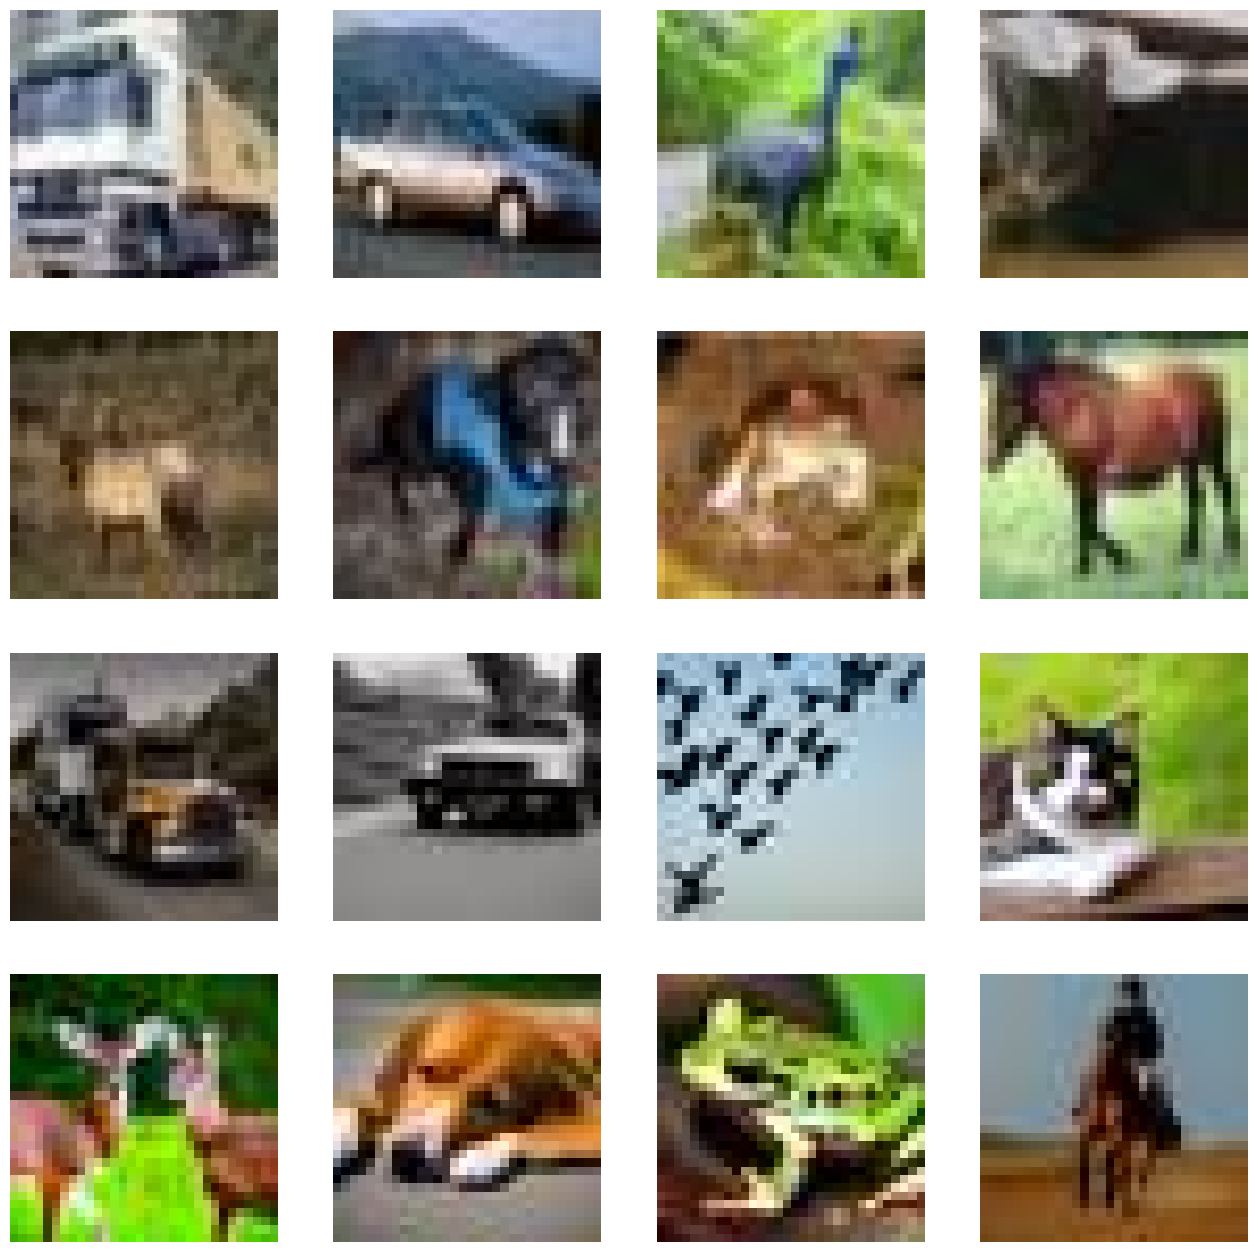

In [29]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

next_real_pix = [os.path.join(real_train_dir, fname) 
                for fname in real_pic_names[ pic_index-8:pic_index] 
               ]

next_fake_pix = [os.path.join(fake_train_dir, fname) 
                for fname in fake_pic_names[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_real_pix+next_fake_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Arsitektur JST

In [2]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(32,32,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3600)              0         
                                                                 
 dense (Dense)               (None, 64)                230464    
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 230,977
Trainable params: 230,977
Non-trainable params: 0
__________________________________________________

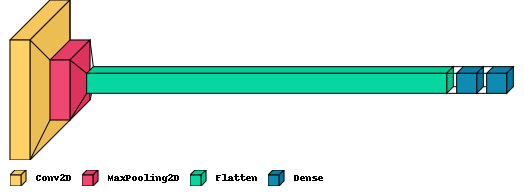

In [9]:
import visualkeras

visualkeras.layered_view(model, legend=True)
  # Display the visual representation with a legend

## Data Preprocessing

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(32, 32))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =test_datagen.flow_from_directory(test_dir,
                                                       batch_size=20,
                                                       class_mode  = 'binary',
                                                       target_size = (32, 32))

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


## Training using 1st Order Algorithm

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [34]:
import time

start_time = time.time()

history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=15,
            validation_data=validation_generator,
            validation_steps=50,
            verbose=2
            )

end_time = time.time()
total_time = end_time - start_time

print("Total training time: ", total_time, " seconds")

Epoch 1/15
100/100 - 41s - loss: 0.6281 - accuracy: 0.6530 - val_loss: 0.5627 - val_accuracy: 0.7100 - 41s/epoch - 412ms/step
Epoch 2/15
100/100 - 49s - loss: 0.5357 - accuracy: 0.7305 - val_loss: 0.6179 - val_accuracy: 0.6520 - 49s/epoch - 490ms/step
Epoch 3/15
100/100 - 56s - loss: 0.4976 - accuracy: 0.7670 - val_loss: 0.5160 - val_accuracy: 0.7460 - 56s/epoch - 555ms/step
Epoch 4/15
100/100 - 71s - loss: 0.4723 - accuracy: 0.7795 - val_loss: 0.4838 - val_accuracy: 0.7510 - 71s/epoch - 707ms/step
Epoch 5/15
100/100 - 113s - loss: 0.4312 - accuracy: 0.7965 - val_loss: 0.4160 - val_accuracy: 0.8250 - 113s/epoch - 1s/step
Epoch 6/15
100/100 - 70s - loss: 0.4510 - accuracy: 0.7820 - val_loss: 0.3937 - val_accuracy: 0.8320 - 70s/epoch - 698ms/step
Epoch 7/15
100/100 - 78s - loss: 0.4223 - accuracy: 0.8020 - val_loss: 0.3601 - val_accuracy: 0.8450 - 78s/epoch - 776ms/step
Epoch 8/15
100/100 - 78s - loss: 0.3986 - accuracy: 0.8160 - val_loss: 0.5436 - val_accuracy: 0.7200 - 78s/epoch - 777m

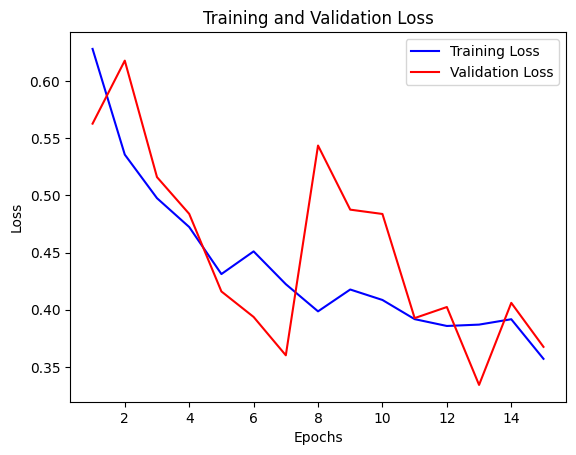

In [35]:
import matplotlib.pyplot as plt

# Get the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

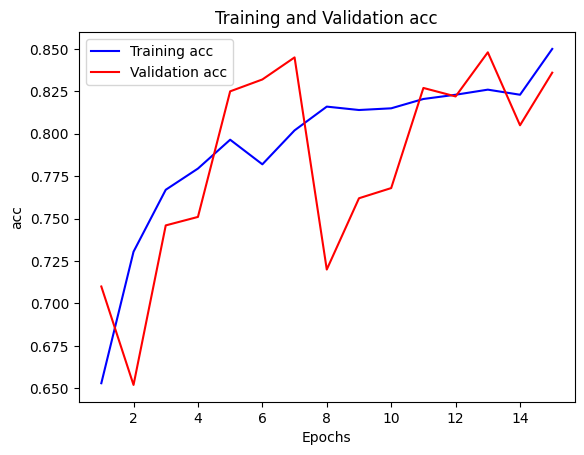

In [36]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [37]:
model.save("model_rmsprop2.h5")

### Training using Levenberg-Marquardt Algorithm

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import levenberg_marquardt as lm

In [41]:
from tensorflow.keras.optimizers import RMSprop
model_wrapper = lm.ModelWrapper(model)
model_wrapper.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss=lm.BinaryCrossentropy(),
    metrics=['accuracy'])

In [42]:
start_time = time.time()

history = model_wrapper.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=15,
            validation_data=validation_generator,
            validation_steps=50,
            verbose=2
            )

end_time = time.time()
total_time = end_time - start_time
print("Total training time: ", total_time, " seconds")

Epoch 1/15
100/100 - 34s - damping_factor: 1.0000e-10 - attempts: 1.0000 - loss: 0.7503 - accuracy: 0.8395 - val_loss: 0.8865 - val_accuracy: 0.8100 - 34s/epoch - 340ms/step
Epoch 2/15
100/100 - 53s - damping_factor: 1.0000e-10 - attempts: 1.0000 - loss: 1.1561 - accuracy: 0.7790 - val_loss: 1.3443 - val_accuracy: 0.7790 - 53s/epoch - 534ms/step
Epoch 3/15
100/100 - 61s - damping_factor: 0.0100 - attempts: 1.0000 - loss: 1.8727 - accuracy: 0.7815 - val_loss: 1.8561 - val_accuracy: 0.7700 - 61s/epoch - 612ms/step
Epoch 4/15
100/100 - 59s - damping_factor: 1.0000e-10 - attempts: 1.0000 - loss: 0.3953 - accuracy: 0.7845 - val_loss: 2.1558 - val_accuracy: 0.7790 - 59s/epoch - 590ms/step
Epoch 5/15
100/100 - 54s - damping_factor: 1.0000e-07 - attempts: 1.0000 - loss: 0.2097 - accuracy: 0.7825 - val_loss: 1.4468 - val_accuracy: 0.7970 - 54s/epoch - 539ms/step
Epoch 6/15
100/100 - 64s - damping_factor: 1.0000e-10 - attempts: 1.0000 - loss: 2.3736 - accuracy: 0.8180 - val_loss: 1.6021 - val_ac

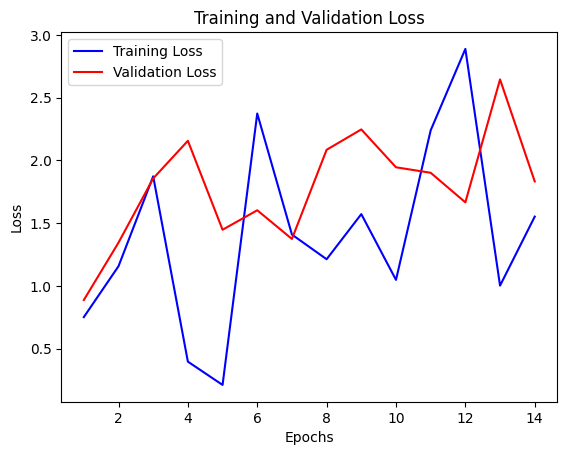

In [43]:
import matplotlib.pyplot as plt

# Get the training and validation loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

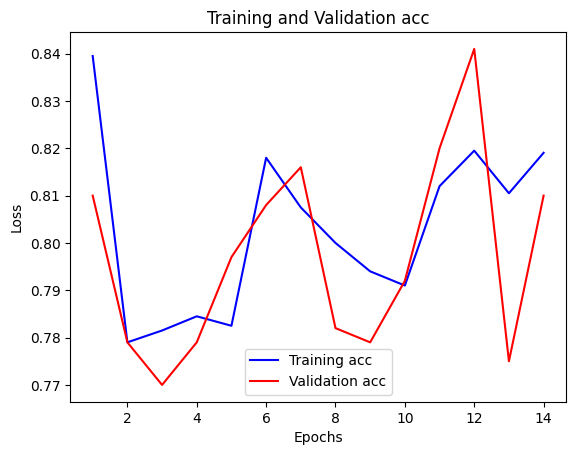

In [44]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the training and validation loss
plt.plot(epochs, train_acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
model.save("lm_model2.h5")